In [1]:
from flask import Flask
import numpy
import json
import sys
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import joblib
import stripe

In [8]:
test_data = pd.read_csv('test_transaction.csv')

In [9]:
test_data.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data = pd.read_csv('train_transaction.csv')

In [11]:
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data =  data.loc[:,['TransactionID','TransactionAmt','isFraud','id_01','id_02','id_03','id_04','id_06']]
data = data.fillna(0)
#y_train = pd.read_csv('train_identity.csv')
#y_train.head()
data.head()

C:\Users\Vinayaka\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,TransactionID,TransactionAmt,isFraud,id_01,id_02,id_03,id_04,id_06
0,2987000,68.5,0,0.0,0.0,0.0,0.0,0.0
1,2987001,29.0,0,0.0,0.0,0.0,0.0,0.0
2,2987002,59.0,0,0.0,0.0,0.0,0.0,0.0
3,2987003,50.0,0,0.0,0.0,0.0,0.0,0.0
4,2987004,50.0,0,0.0,0.0,0.0,0.0,0.0


In [13]:
for col, values in data.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')
    
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
#data = data.fillna(0)
#for column in data.columns:
#    if data[column].dtype == type(object):
#        le = LabelEncoder()
#        data[column] = le.fit_transform(data[column])

TransactionID: 590540
[2987000 2987001 2987002 ... 3577537 3577538 3577539]


TransactionAmt: 20902
[  68.5    29.     59.   ...  557.54 1659.95  400.78]


isFraud: 2
[0 1]


id_01: 1
[0.]


id_02: 1
[0.]


id_03: 1
[0.]


id_04: 1
[0.]


id_06: 1
[0.]




In [14]:
for col, values in data.iteritems():
    print(col)   

TransactionID
TransactionAmt
isFraud
id_01
id_02
id_03
id_04
id_06


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#data = X_train
#data = data.fillna(0)
data.head()

,TransactionID,TransactionAmt,isFraud,id_01,id_02,id_03,id_04,id_06
0,2987000,68.5,0,0.0,0.0,0.0,0.0,0.0
1,2987001,29.0,0,0.0,0.0,0.0,0.0,0.0
2,2987002,59.0,0,0.0,0.0,0.0,0.0,0.0
3,2987003,50.0,0,0.0,0.0,0.0,0.0,0.0
4,2987004,50.0,0,0.0,0.0,0.0,0.0,0.0


In [17]:
X = data.loc[:, data.columns != 'isFraud']
#X = scale(X)
y = data.isFraud

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 20)

In [19]:
model_logr = LogisticRegression(C=1e5)

In [20]:
frauds = data.loc[data['isFraud'] == 1]
non_frauds = data.loc[data['isFraud'] == 0]
print(len(frauds))
print(len(non_frauds))

20663
569877


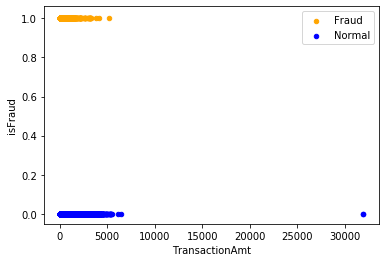

In [31]:
import matplotlib.pyplot as plt
ax = frauds.plot.scatter(x='TransactionAmt', y='isFraud', color='Orange',label='Fraud')
non_frauds.plot.scatter(x='TransactionAmt', y='isFraud', color='Blue',label='Normal', ax=ax) 
plt.show()

In [22]:
model_logr.fit(X_train,y_train)

C:\Users\Vinayaka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_predict = model_logr.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

0.966132692112304


In [25]:
model_logr.score(X_test, y_test)

0.966132692112304